<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
import pandas as pd
df_iris = pd.DataFrame(iris.data)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3')
df_iris.to_sql('iris_resource', connect, if_exists='append', index=False)


In [5]:
df_load = pd.read_sql_query('select * from iris_resource', connect)
df_load.head(4)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [6]:
x_data = df_load.to_numpy()
x_data.shape


(150, 4)

In [7]:
import numpy as np


In [8]:
y_data = iris.target
y_data, np.unique(y_data)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 1, 2]))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data)

In [11]:
import tensorflow as tf


In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(4,))) # input layer

model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(24, activation='relu')) # hidden layer

model.add(tf.keras.layers.Dense(3, activation='softmax')) # output layer


model.compile(optimizer='adam', loss='mse', metrics=['acc'], ) # gadget


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [13]:
#model.fit(x_data, y_data, epochs=50, validation_split=0.3) 
model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))

 

Epoch 1/50
4/4 [==============================] - 1s 94ms/step - loss: 1.1414 - acc: 0.3839 - val_loss: 1.0624 - val_acc: 0.3158
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.1321 - acc: 0.1339 - val_loss: 1.0614 - val_acc: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 1.1318 - acc: 0.1161 - val_loss: 1.0615 - val_acc: 0.2105
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 1.1311 - acc: 0.2857 - val_loss: 1.0593 - val_acc: 0.1579
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 1.1294 - acc: 0.3036 - val_loss: 1.0589 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 1.1296 - acc: 0.5714 - val_loss: 1.0594 - val_acc: 0.5526
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 1.1297 - acc: 0.5179 - val_loss: 1.0590 - val_acc: 0.3947
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 1.1293 - acc: 0.2946 - val_lo

Evaluation


In [14]:
model.evaluate(x_data, y_data)

5/5 [==============================] - 0s 2ms/step - loss: 1.1112 - acc: 0.3400


[1.1111994981765747, 0.3400000035762787]

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
y_pred = model.predict(x_data)
y_pred.shape,y_pred[4]

((150, 3), array([0.3332555 , 0.33361372, 0.33313087], dtype=float32))

In [17]:
import numpy as np
y_pred_argmax = np.argmax(y_pred,axis=1)
y_pred_argmax.shape, y_pred_argmax[4]

((150,), 1)

In [18]:
y_data.shape, y_data[4]

((150,), 0)

In [19]:
print(classification_report(y_data, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43        50
           1       0.29      0.28      0.29        50
           2       0.31      0.30      0.30        50

    accuracy                           0.34       150
   macro avg       0.34      0.34      0.34       150
weighted avg       0.34      0.34      0.34       150



In [20]:
confusion_matrix(y_data, y_pred_argmax)

array([[22, 13, 15],
       [17, 14, 19],
       [14, 21, 15]])

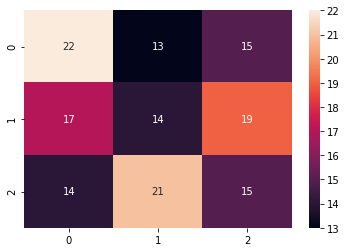

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_data, y_pred_argmax), annot=True)

In [23]:
import numpy as np
np.argmax(pred)

NameError: ignored

In [ ]:
classification_report()